In [80]:
%pylab inline

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.2, rc={'figure.figsize': (10, 8)})

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('bdata.20130222.mhci.public.1.txt', sep='\t')

In [3]:
df.head()

,species,mhc,peptide_length,cv,sequence,inequality,meas
0,cow,BoLA-HD6,9,TBD,ALFYKDGKL,=,1.000000
1,cow,BoLA-HD6,9,TBD,ALYEKKLAL,=,1.000000
2,cow,BoLA-HD6,9,TBD,AMKDRFQPL,=,4.521706
3,cow,BoLA-HD6,9,TBD,AQRELFFTL,=,1.000000
4,cow,BoLA-HD6,9,TBD,FMKVKFEAL,=,1.576747


In [4]:
df.describe()

,peptide_length,meas
count,179692.000000,1.796920e+05
mean,9.249293,2.112472e+04
std,0.714603,5.986279e+04
min,8.000000,1.000000e+00
25%,9.000000,3.589934e+02
50%,9.000000,1.474869e+04
75%,9.000000,2.000000e+04
max,30.000000,1.427660e+07


In [83]:
len(df[df.inequality != '=']) / len(df)

0.41728624535315983

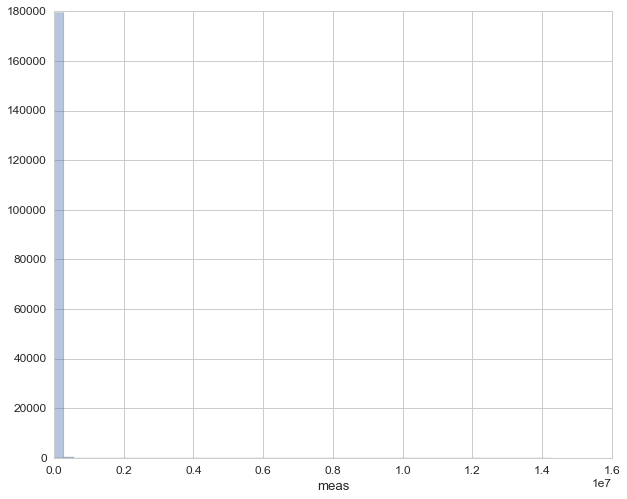

In [22]:
sns.distplot(df.meas, kde=False);

In [11]:
df.meas.count()

179692

In [40]:
df[df.meas > 50e3].meas.count()

25815

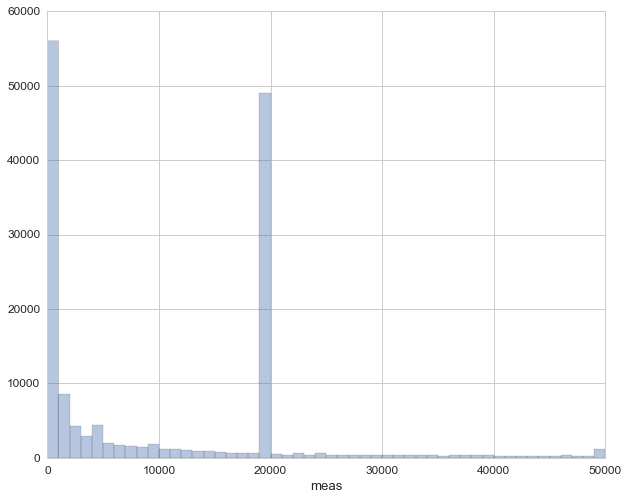

In [39]:
sns.distplot(df[df.meas <= 50e3].meas, kde=False);

In [44]:
target_mhc_label = df.mhc.value_counts().argmax()

In [46]:
df2 = df[df.mhc == target_mhc_label]

In [48]:
df2 = df2[df2.inequality == '=']

In [50]:
df2 = df2[df2.peptide_length == 9]

In [54]:
df2.head()

,species,mhc,peptide_length,cv,sequence,inequality,meas
14593,human,HLA-A*02:01,9,TBD,AAAATCALV,=,41.005164
14594,human,HLA-A*02:01,9,TBD,AAAFVNQHL,=,5017.000000
14595,human,HLA-A*02:01,9,TBD,AAAKAAAAV,=,392.232074
14596,human,HLA-A*02:01,9,TBD,AAAKTPVIV,=,34725.571687
14598,human,HLA-A*02:01,9,TBD,AAASSLLYK,=,59419.198044


In [58]:
df2 = df2.loc[:, ['sequence', 'meas']]

In [78]:
len(df2)

5927

In [79]:
df2.nlargest(5, 'meas')

,sequence,meas
16952,GKRSNTTGK,14276600.0
19703,MMVIFRLMR,5442290.0
20918,RRTRREAIV,5058770.0
18650,KTLCDMIKG,4818010.0
18196,KEGAFFLYD,3839720.0


In [87]:
def gen_kmers(s, k=1):
    """Generate consecutive subsequences of length k.
    >>> gen_kmers('abcd')
    ['a', 'b', 'c', 'd', 'e']
    >>> gen_kmers('abcde', 3)
    ['abc', 'bcd', 'cde']
    """
    return [s[i:i+k] for i in range(len(s)-k+1)]

In [ ]:
sns.distplot(df[df.inequality != '='].meas, kde=False)